<a href="https://colab.research.google.com/github/AykanIpek/predict-house-price/blob/main/FinalProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


##**Libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.impute import KNNImputer,SimpleImputer
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


##**Datasets**

In [ ]:
df_m = pd.read_csv('/content/drive/MyDrive/Housing London Data/housing_in_london_monthly_variables.csv')
df_y = pd.read_csv('/content/drive/MyDrive/Housing London Data/housing_in_london_yearly_variables.csv')

##**Data Preprocessing And Exploration**

In [ ]:
df_m.head()

,date,area,average_price,code,houses_sold,no_of_crimes,borough_flag
0,1995-01-01,city of london,91449,E09000001,17.0,NaN,1
1,1995-02-01,city of london,82203,E09000001,7.0,NaN,1
2,1995-03-01,city of london,79121,E09000001,14.0,NaN,1
3,1995-04-01,city of london,77101,E09000001,7.0,NaN,1
4,1995-05-01,city of london,84409,E09000001,10.0,NaN,1


In [ ]:
df_m.shape

(13549, 7)

In [ ]:
df_m.describe()

,average_price,houses_sold,no_of_crimes,borough_flag
count,1.354900e+04,13455.000000,7439.000000,13549.000000
mean,2.635197e+05,3893.994129,2158.352063,0.733338
std,1.876175e+05,12114.402476,902.087742,0.442230
min,4.072200e+04,2.000000,0.000000,0.000000
25%,1.323800e+05,247.000000,1623.000000,0.000000
50%,2.229190e+05,371.000000,2132.000000,1.000000
75%,3.368430e+05,3146.000000,2582.000000,1.000000
max,1.463378e+06,132163.000000,7461.000000,1.000000


In [ ]:
df_m.size

94843

In [ ]:
df_m.dtypes

,0
date,object
area,object
average_price,int64
code,object
houses_sold,float64
no_of_crimes,float64
borough_flag,int64


In [ ]:
df_m['borough_flag'].nunique()

2

In [ ]:
df_m[df_m['borough_flag']!=1]

,date,area,average_price,code,houses_sold,no_of_crimes,borough_flag
3355,1998-04-01,south east,83176,E09000012,NaN,NaN,0
3356,1998-04-01,south east,83176,E12000008,15354.0,NaN,0
9938,1995-01-01,inner london,78252,E13000001,2890.0,NaN,0
9939,1995-02-01,inner london,75886,E13000001,2583.0,NaN,0
9940,1995-03-01,inner london,76592,E13000001,3643.0,NaN,0
...,...,...,...,...,...,...,...
13544,2019-09-01,england,249942,E92000001,64605.0,NaN,0
13545,2019-10-01,england,249376,E92000001,68677.0,NaN,0
13546,2019-11-01,england,248515,E92000001,67814.0,NaN,0
13547,2019-12-01,england,250410,E92000001,NaN,NaN,0


In [ ]:
df_m[df_m['borough_flag']!=1]['area']

,area
3355,south east
3356,south east
9938,inner london
9939,inner london
9940,inner london
...,...
13544,england
13545,england
13546,england
13547,england


In [ ]:
df_m[df_m['borough_flag']!=1]['area'].unique()

array(['south east', 'inner london', 'outer london', 'north east',
       'north west', 'yorks and the humber', 'east midlands',
       'west midlands', 'east of england', 'london', 'south west',
       'england'], dtype=object)

In [ ]:
df_m[df_m['borough_flag']==1]['area'].unique()

array(['city of london', 'barking and dagenham', 'barnet', 'bexley',
       'brent', 'bromley', 'camden', 'croydon', 'ealing', 'enfield',
       'tower hamlets', 'greenwich', 'hackney', 'hammersmith and fulham',
       'haringey', 'harrow', 'havering', 'hillingdon', 'hounslow',
       'islington', 'kensington and chelsea', 'kingston upon thames',
       'lambeth', 'lewisham', 'merton', 'newham', 'redbridge',
       'richmond upon thames', 'southwark', 'sutton', 'waltham forest',
       'wandsworth', 'westminster'], dtype=object)

In [ ]:
df_m[df_m['borough_flag']!=1]['area'].nunique()

12

In [ ]:
df_m[df_m['borough_flag']==1]['area'].nunique()

33

In [ ]:
len(df_m[df_m['borough_flag']!=1])

3613

In [ ]:
len(df_m)

13549

In [ ]:
df_m = df_m[df_m['borough_flag']==1]
len(df_m)

9936

In [ ]:
df_m['date'] = pd.to_datetime(df_m['date'])

In [ ]:
df_m.dtypes

,0
date,datetime64[ns]
area,object
average_price,int64
code,object
houses_sold,float64
no_of_crimes,float64
borough_flag,int64


In [ ]:
df_m['date'] = df_m['date'].dt.year


In [ ]:
df_m

,date,area,average_price,code,houses_sold,no_of_crimes,borough_flag
0,1995,city of london,91449,E09000001,17.0,NaN,1
1,1995,city of london,82203,E09000001,7.0,NaN,1
2,1995,city of london,79121,E09000001,14.0,NaN,1
3,1995,city of london,77101,E09000001,7.0,NaN,1
4,1995,city of london,84409,E09000001,10.0,NaN,1
...,...,...,...,...,...,...,...
9933,2019,westminster,925955,E09000033,169.0,6384.0,1
9934,2019,westminster,927864,E09000033,168.0,7208.0,1
9935,2019,westminster,955615,E09000033,150.0,6843.0,1
9936,2019,westminster,968404,E09000033,NaN,7461.0,1


In [ ]:
df_y.head()

,code,area,date,median_salary,life_satisfaction,mean_salary,recycling_pct,population_size,number_of_jobs,area_size,no_of_houses,borough_flag
0,E09000001,city of london,1999-12-01,33020.0,NaN,48922,0,6581.0,NaN,NaN,NaN,1
1,E09000002,barking and dagenham,1999-12-01,21480.0,NaN,23620,3,162444.0,NaN,NaN,NaN,1
2,E09000003,barnet,1999-12-01,19568.0,NaN,23128,8,313469.0,NaN,NaN,NaN,1
3,E09000004,bexley,1999-12-01,18621.0,NaN,21386,18,217458.0,NaN,NaN,NaN,1
4,E09000005,brent,1999-12-01,18532.0,NaN,20911,6,260317.0,NaN,NaN,NaN,1


In [ ]:
df_y['area'].unique()


array(['city of london', 'barking and dagenham', 'barnet', 'bexley',
       'brent', 'bromley', 'camden', 'croydon', 'ealing', 'enfield',
       'greenwich', 'hackney', 'hammersmith and fulham', 'haringey',
       'harrow', 'havering', 'hillingdon', 'hounslow', 'islington',
       'kensington and chelsea', 'kingston upon thames', 'lambeth',
       'lewisham', 'merton', 'newham', 'redbridge',
       'richmond upon thames', 'southwark', 'sutton', 'tower hamlets',
       'waltham forest', 'wandsworth', 'westminster', 'north east',
       'north west', 'yorkshire and the humber', 'east midlands',
       'west midlands', 'east', 'london', 'south east', 'south west',
       'inner london', 'outer london', 'england', 'united kingdom',
       'great britain', 'england and wales', 'northern ireland',
       'scotland', 'wales'], dtype=object)

In [ ]:
df_y['area'].nunique()

51

In [ ]:
df_y[df_y['borough_flag']!=1]['area'].nunique()

18

In [ ]:
df_y[df_y['borough_flag']!=1]['area'].unique()

array(['north east', 'north west', 'yorkshire and the humber',
       'east midlands', 'west midlands', 'east', 'london', 'south east',
       'south west', 'inner london', 'outer london', 'england',
       'united kingdom', 'great britain', 'england and wales',
       'northern ireland', 'scotland', 'wales'], dtype=object)

In [ ]:
len(df_y)

1071

In [ ]:
df_y = df_y[df_y['borough_flag']==1]
len(df_y)

693

In [ ]:
df_y.dtypes

,0
code,object
area,object
date,object
median_salary,float64
life_satisfaction,float64
mean_salary,object
recycling_pct,object
population_size,float64
number_of_jobs,float64
area_size,float64


In [ ]:
df_y.shape

(693, 12)

In [ ]:
df_y['date'] = pd.to_datetime(df_y['date'])

In [ ]:
df_y.dtypes

,0
code,object
area,object
date,datetime64[ns]
median_salary,float64
life_satisfaction,float64
mean_salary,object
recycling_pct,object
population_size,float64
number_of_jobs,float64
area_size,float64


In [ ]:
df_y['date'] = df_y['date'].dt.year

In [ ]:
df_y

,code,area,date,median_salary,life_satisfaction,mean_salary,recycling_pct,population_size,number_of_jobs,area_size,no_of_houses,borough_flag
0,E09000001,city of london,1999,33020.0,NaN,48922,0,6581.0,NaN,NaN,NaN,1
1,E09000002,barking and dagenham,1999,21480.0,NaN,23620,3,162444.0,NaN,NaN,NaN,1
2,E09000003,barnet,1999,19568.0,NaN,23128,8,313469.0,NaN,NaN,NaN,1
3,E09000004,bexley,1999,18621.0,NaN,21386,18,217458.0,NaN,NaN,NaN,1
4,E09000005,brent,1999,18532.0,NaN,20911,6,260317.0,NaN,NaN,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...
1048,E09000029,sutton,2019,32947.0,NaN,37392,NaN,NaN,NaN,NaN,NaN,1
1049,E09000030,tower hamlets,2019,46142.0,NaN,69434,NaN,NaN,NaN,NaN,NaN,1
1050,E09000031,waltham forest,2019,30718.0,NaN,33119,NaN,NaN,NaN,NaN,NaN,1
1051,E09000032,wandsworth,2019,34168.0,NaN,39617,NaN,NaN,NaN,NaN,NaN,1


In [ ]:
df_y['date'].min()


1999

In [ ]:
df_y['date'].max()

2019

In [ ]:
df_m['date'].min()

1995

In [ ]:
df_m['date'].max()

2020

In [ ]:
df_m = df_m[(df_m['date']>=1999) & (df_m['date'] < 2020)]

In [ ]:
print("min:{}, max:{}".format(df_m['date'].min(), df_m['date'].max()))

min:1999, max:2019


In [ ]:
print("number of area:{} and {}".format(df_y['area'].nunique(), df_m['area'].nunique()))

number of area:33 and 33


In [ ]:
df_m_gb = df_m.groupby(['area','date']).mean(numeric_only=True).reset_index()
df_y_gb = df_y.groupby(['area','date']).mean(numeric_only=True).reset_index()

In [ ]:
df_m_gb.head()

,area,date,average_price,houses_sold,no_of_crimes,borough_flag
0,barking and dagenham,1999,65320.833333,223.833333,NaN,1.0
1,barking and dagenham,2000,77549.500000,234.416667,NaN,1.0
2,barking and dagenham,2001,88664.000000,266.916667,1706.333333,1.0
3,barking and dagenham,2002,112221.916667,287.416667,1670.000000,1.0
4,barking and dagenham,2003,142499.000000,301.250000,1757.083333,1.0


In [ ]:
df_y_gb.head()

,area,date,median_salary,life_satisfaction,population_size,number_of_jobs,area_size,no_of_houses,borough_flag
0,barking and dagenham,1999,21480.0,NaN,162444.0,NaN,NaN,NaN,1.0
1,barking and dagenham,2000,22618.0,NaN,163893.0,57000.0,NaN,NaN,1.0
2,barking and dagenham,2001,22323.0,NaN,165654.0,54000.0,3780.0,68298.0,1.0
3,barking and dagenham,2002,24813.0,NaN,166357.0,52000.0,3780.0,68526.0,1.0
4,barking and dagenham,2003,25358.0,NaN,166210.0,55000.0,3780.0,68837.0,1.0


In [ ]:
total_data = pd.merge(df_m_gb, df_y_gb, on=['area','date'], how='outer')

In [ ]:
total_data.head()

,area,date,average_price,houses_sold,no_of_crimes,borough_flag_x,median_salary,life_satisfaction,population_size,number_of_jobs,area_size,no_of_houses,borough_flag_y
0,barking and dagenham,1999,65320.833333,223.833333,NaN,1.0,21480.0,NaN,162444.0,NaN,NaN,NaN,1.0
1,barking and dagenham,2000,77549.500000,234.416667,NaN,1.0,22618.0,NaN,163893.0,57000.0,NaN,NaN,1.0
2,barking and dagenham,2001,88664.000000,266.916667,1706.333333,1.0,22323.0,NaN,165654.0,54000.0,3780.0,68298.0,1.0
3,barking and dagenham,2002,112221.916667,287.416667,1670.000000,1.0,24813.0,NaN,166357.0,52000.0,3780.0,68526.0,1.0
4,barking and dagenham,2003,142499.000000,301.250000,1757.083333,1.0,25358.0,NaN,166210.0,55000.0,3780.0,68837.0,1.0


In [ ]:
total_data.shape

(693, 13)

In [ ]:
total_data.dtypes

,0
area,object
date,int32
average_price,float64
houses_sold,float64
no_of_crimes,float64
borough_flag_x,float64
median_salary,float64
life_satisfaction,float64
population_size,float64
number_of_jobs,float64


In [ ]:
total_data.isnull().sum()

,0
area,0
date,0
average_price,0
houses_sold,0
no_of_crimes,75
borough_flag_x,0
median_salary,10
life_satisfaction,437
population_size,33
number_of_jobs,66


In [ ]:
x = total_data.drop(["average_price"], axis=1)
y = total_data["average_price"]

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

num_cols =[col for col in x_train.columns if x_train[col].dtypes != "O"]
cat_cols =[col for col in x_train.columns if x_train[col].dtypes == "O" ]

In [ ]:
fig = px.line(total_data, x='date', y='average_price', color='area', title='Average Price Over Time')
fig.show()

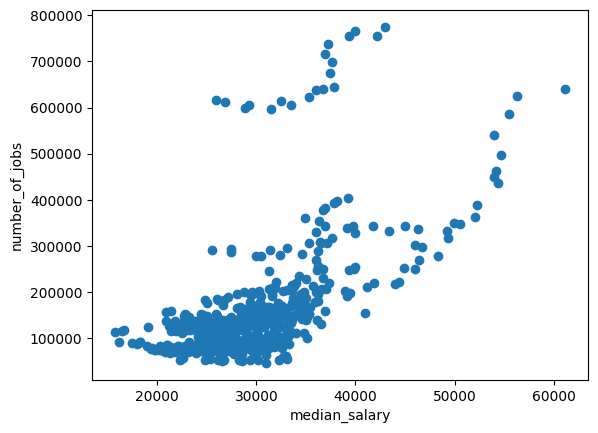

In [ ]:
x = total_data.median_salary
y = total_data.number_of_jobs
plt.scatter(x,y)
plt.xlabel("median_salary")
plt.ylabel("number_of_jobs")
plt.show()

##**Prediction**

In [ ]:
cat_cols

['area']

In [ ]:
num_cols

['date',
 'houses_sold',
 'no_of_crimes',
 'borough_flag_x',
 'median_salary',
 'life_satisfaction',
 'population_size',
 'number_of_jobs',
 'area_size',
 'no_of_houses',
 'borough_flag_y']

In [ ]:
knnImputer = KNNImputer(n_neighbors=5)
knnImputer.fit(x_train[num_cols])

x_train_num = knnImputer.transform(x_train[num_cols])
x_test_num = knnImputer.transform(x_test[num_cols])

In [ ]:
pd.DataFrame(x_train_num).isnull().sum()

,0
0,0
1,0
2,0
3,0
4,0
5,0
6,0
7,0
8,0
9,0


In [ ]:
pd.DataFrame(x_test_num).isnull().sum()

,0
0,0
1,0
2,0
3,0
4,0
5,0
6,0
7,0
8,0
9,0


In [ ]:
standard_scaler = StandardScaler()
standard_scaler.fit(x_train_num)
x_train_num = standard_scaler.transform(x_train_num)
x_test_num = standard_scaler.transform(x_test_num)

Encoding = OneHotEncoder(handle_unknown="ignore",sparse_output=False)
Encoding.fit(x_train[cat_cols])
x_train_cat = Encoding.transform(x_train[cat_cols])
x_test_cat = Encoding.transform(x_test[cat_cols])

x_train = np.concatenate((x_train_cat,x_train_num),axis=1)
x_test = np.concatenate((x_test_cat,x_test_num),axis=1)

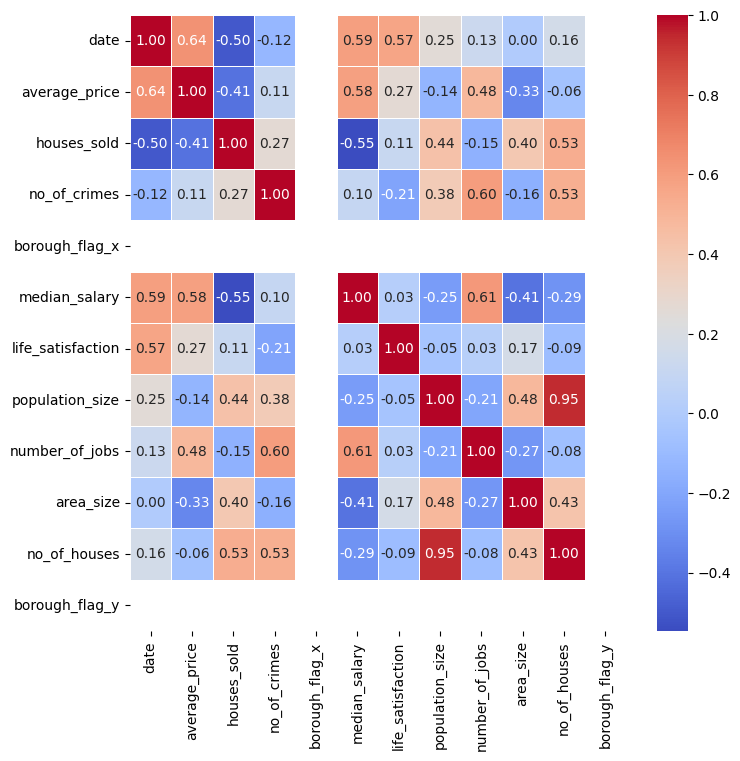

In [ ]:
corr = total_data.select_dtypes(include=np.number).corr()
plt.figure(figsize=(8,8))
sns.heatmap(corr,annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.show()

In [ ]:
selector = SelectKBest(f_regression, k=9)
selector.fit(x_train, y_train)

x_train_selected = selector.transform(x_train)
x_test_selected = selector.transform(x_test)

In [ ]:
dt = DecisionTreeRegressor(random_state=1)
dt.fit(x_train_selected,y_train)
dt_pred = dt.predict(x_test_selected)

rf = RandomForestRegressor(random_state=1)
rf.fit(x_train_selected,y_train)
rf_pred = rf.predict(x_test_selected)

knn = KNeighborsRegressor(n_neighbors=7)
knn.fit(x_train_selected,y_train)
knn_pred = knn.predict(x_test_selected)

In [ ]:
def evaluate_model(y_test,y_pred,model_name):
    mae = mean_absolute_error(y_test,y_pred)
    mse = mean_squared_error(y_test,y_pred)
    r2 = r2_score(y_test,y_pred)
    print("Performance of {}".format(model_name))
    print("MAE:{}".format(mae))
    print("MSE:{}".format(mse))
    print("R2:{}".format(r2))

In [ ]:
evaluate_model(y_test,dt_pred,"Decision Tree Regressor")
print("------------------------------------------------")
evaluate_model(y_test,rf_pred,"Random Forest Regressor ")
print("------------------------------------------------")
evaluate_model(y_test,knn_pred,"KNN Regressor")

Performance of Decision Tree Regressor
MAE:51788.13908872902
MSE:5919348867.707832
R2:0.8199038965909172
------------------------------------------------
Performance of Random Forest Regressor 
MAE:34133.47582733811
MSE:2239100449.3615794
R2:0.9318754013179663
------------------------------------------------
Performance of KNN Regressor
MAE:45518.46445700582
MSE:3787506038.56594
R2:0.8847651837340964


In [ ]:
param_grid = {
    'n_estimators': [50, 100, 200, 150, 300],      # number of tree
    'max_depth': [None, 10, 20, 30, 40, 50],         # max depth
    'min_samples_split': [2, 5, 10, 3, 8],     # min instance for split
}

grid_search = GridSearchCV(RandomForestRegressor(random_state=1), param_grid=param_grid, cv=5, scoring='r2')
grid_search.fit(x_train_selected, y_train)
best_params = grid_search.best_params_
print(best_params)

{'max_depth': None, 'min_samples_split': 2, 'n_estimators': 300}


In [ ]:
rf_best = RandomForestRegressor(random_state=1,max_depth=None,min_samples_split=2,n_estimators=300)
rf_best.fit(x_train_selected,y_train)
rf_best_pred = rf_best.predict(x_test_selected)
evaluate_model(y_test,rf_best_pred,"Random Forest Regressor with Best Parameters")

Performance of Random Forest Regressor with Best Parameters
MAE:34338.38483413269
MSE:2262249595.6148267
R2:0.9311710888791099


In [ ]:
results_df = pd.DataFrame({"True Value (y_test)": y_test[:10],
                           "Prediction (y_pred)": rf_best_pred[:10]})
print(results_df)

     True Value (y_test)  Prediction (y_pred)
381        247761.166667        250292.258056
665        457404.000000        423075.850833
257        343381.000000        315192.144722
338        145293.666667        178919.989722
319        179117.833333        198288.692222
211        110163.000000        173279.451944
367        236242.666667        265452.469722
176        293783.833333        266425.270000
335        364822.166667        424312.297778
256        318805.750000        299003.244722
